In [ ]:
# Linking with google drive
# simple upload to github, manual here: https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/time_series_analysis/time_series_prediction

/content/drive/My Drive/time_series_analysis/time_series_prediction


In [5]:
#!git clone https://{git_token}@github.com/{username}/{repository}

In [6]:
# trying to import python module as a separate script

In [7]:
import sys
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/dataprocessing/')
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/models/')
sys.path.append('/content/drive/MyDrive/time_series_analysis/time_series_prediction/utils/')

In [8]:
#!pip install nbimporter

In [9]:
import datapreparation
import baselines
import plotting
from matplotlib import pyplot as plt


from sklearn.metrics import *
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate, cross_val_score

In [10]:
#%load utils/plotting.ipynb

In [11]:
#%load models/baselines.ipynb

In [12]:
#%load time_series_prediction/models/baselines.py

In [13]:
#%load time_series_prediction/dataprocessing/datapreparation.py

In [14]:
import pandas as pd

In [15]:
sales_data = pd.read_csv("/content/sales.csv",   header = 0, sep = ";")
categories = pd.read_csv("/content/categories.csv",   header = 0, sep = ";")
traffic = pd.read_csv("/content/traffic.csv",   header = 0, sep = ";")

In [16]:
traffic['DateTime'] = traffic['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
traffic.drop("week_starting_date", axis = 1, inplace = True)

traffic = traffic.set_index(["product_id", "DateTime"])
categories = categories.set_index(["product_id"])

In [17]:
# extended only to global max date horizon
# check nulls here because looks strange
sales_df_combined_right = datapreparation.prepare_sales_data(sales_data, categories, traffic, True, True, [1,2,3])

In [18]:
sample = sales_df_combined_right.loc[[2658, 1308]]

In [19]:
# for i in all_items:
#   print("*******************")
#   print(i)
#   tmp_dataset = sales_df_combined_right.loc[i]
#   #n_splits_tmp = int(np.floor((tmp_dataset.shape[0] - 3)/2))
#   try:
#     tscv = TimeSeriesSplit(n_splits=5, test_size = 3)
#     for tr_index, val_index in tscv.split(tmp_dataset):
#       print (tr_index, val_index)
#       X_tr, X_val = tmp_dataset[["sales"]].iloc[tr_index], tmp_dataset[["sales"]].iloc[val_index]
#       print(X_tr)
#       print(X_val)
#       forecast = get_naive_forecast(X_tr.sales, horizon = 3)
#       print(forecast)
#       print(mean_absolute_percentage_error(X_val.sales, forecast))
#   except Exception as e:
#     print(e)

In [20]:
model_naive = baselines.NaiveForecast(horizon=3)

In [21]:
model_mean = baselines.MeanForecast(horizon=3)

In [22]:
model_drift = baselines.DriftForecast(horizon=3)

### Study on one case 2658

In [23]:
# baseline models
drift_forecast = model_drift.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])
naive_forecast = model_naive.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])
mean_forecast = model_mean.fit(sales_df_combined_right.loc[2658].sales[:-3]).predict(sales_df_combined_right.loc[2658].sales[-3:])

In [24]:
forecasts = {'drift_foreast': drift_forecast, 'naive_forecast': naive_forecast, 'mean_forecast': mean_forecast}

In [25]:
#!pip install scikit-learn==0.24.0

In [26]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores = cross_val_score(model_naive, sales_df_combined_right.loc[2658].sales, sales_df_combined_right.loc[2658].sales,  cv=tscv, 
                            scoring='neg_root_mean_squared_error', n_jobs=1)

In [27]:
cv_scores

array([ -23.44497103,  -16.51262144,  -20.16597795,  -51.17942295,
        -15.28615932,  -40.81666326, -141.99530509, -116.83606749,
       -100.4473328 , -197.10318787])

In [31]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores_multiple = cross_validate(model_naive, sales_df_combined_right.loc[2658].sales, sales_df_combined_right.loc[2658].sales,  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

In [43]:
cv_scores_multiple

{'fit_time': array([0.00131798, 0.00082636, 0.00065422, 0.00062227, 0.0006175 ,
        0.00063372, 0.00061059, 0.0006485 , 0.00064659, 0.00063896]),
 'score_time': array([0.00408506, 0.00237942, 0.0022049 , 0.00237036, 0.00218177,
        0.00211763, 0.00240993, 0.00250435, 0.00212193, 0.0022893 ]),
 'test_neg_mean_absolute_error': array([ -22.33333333,  -16.        ,  -18.        ,  -48.66666667,
         -15.        ,  -38.        , -128.        , -113.33333333,
         -99.        , -175.        ]),
 'test_neg_mean_absolute_percentage_error': array([ -0.57138047,  -0.30133544,  -0.24686937,  -1.37473684,
         -0.83397933,  -0.45267358,  -1.05507358,  -0.80410695,
         -0.39149541, -12.56408259]),
 'test_neg_mean_squared_log_error': array([-0.21225523, -0.10173394, -0.0746976 , -0.73769667, -0.43808633,
        -0.39843534, -1.2859371 , -2.6898687 , -0.2514351 , -4.99249355]),
 'test_neg_root_mean_squared_error': array([ -23.44497103,  -16.51262144,  -20.16597795,  -51.1794

In [38]:
[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

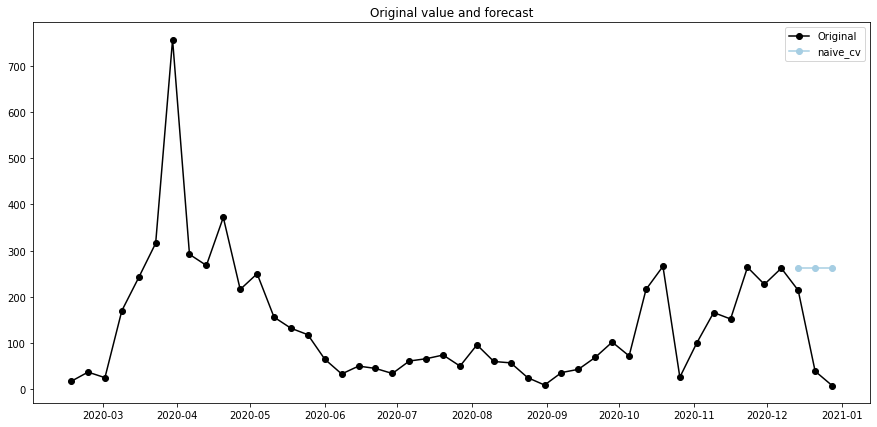

In [42]:
sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]]
naive_cv = {'naive_cv': model_naive.fit(sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][0]]).predict(sales_df_combined_right.loc[2658].sales[[i for i in tscv.split(sales_df_combined_right.loc[2658].sales)][9][1]])}

plotting.plot_original_and_forecasts(original_series = sales_df_combined_right.loc[2658].sales
                                     , dict_with_forecasts = naive_cv)

In [32]:
cv_scores_multiple

{'fit_time': array([0.00131798, 0.00082636, 0.00065422, 0.00062227, 0.0006175 ,
        0.00063372, 0.00061059, 0.0006485 , 0.00064659, 0.00063896]),
 'score_time': array([0.00408506, 0.00237942, 0.0022049 , 0.00237036, 0.00218177,
        0.00211763, 0.00240993, 0.00250435, 0.00212193, 0.0022893 ]),
 'test_neg_mean_absolute_error': array([ -22.33333333,  -16.        ,  -18.        ,  -48.66666667,
         -15.        ,  -38.        , -128.        , -113.33333333,
         -99.        , -175.        ]),
 'test_neg_mean_absolute_percentage_error': array([ -0.57138047,  -0.30133544,  -0.24686937,  -1.37473684,
         -0.83397933,  -0.45267358,  -1.05507358,  -0.80410695,
         -0.39149541, -12.56408259]),
 'test_neg_mean_squared_log_error': array([-0.21225523, -0.10173394, -0.0746976 , -0.73769667, -0.43808633,
        -0.39843534, -1.2859371 , -2.6898687 , -0.2514351 , -4.99249355]),
 'test_neg_root_mean_squared_error': array([ -23.44497103,  -16.51262144,  -20.16597795,  -51.1794

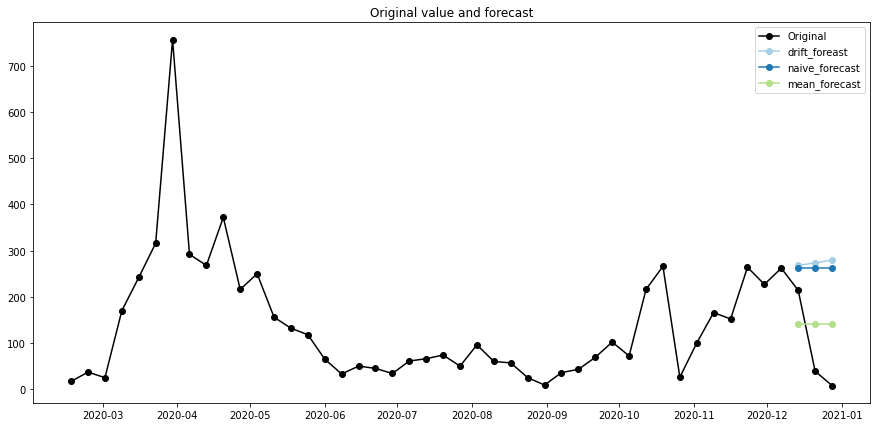

In [31]:
plotting.plot_original_and_forecasts(original_series = sales_df_combined_right.loc[2658].sales, dict_with_forecasts = forecasts)

In [ ]:
# cross validation error

In [ ]:
# linear regression error only on traffic
# traffic lag 1w
# traffic to sales


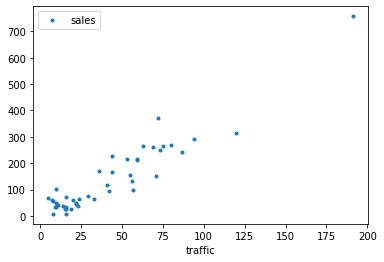

In [26]:
sales_df_combined_right.loc[2658].plot(x='traffic', y='sales', style='.')

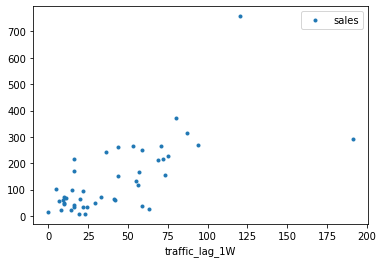

In [27]:
sales_df_combined_right.loc[2658].plot(x='traffic_lag_1W', y='sales', style='.')

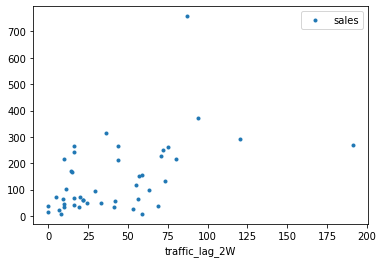

In [28]:
sales_df_combined_right.loc[2658].plot(x='traffic_lag_2W', y='sales', style='.')

In [62]:
abc = sales_df_combined_right.loc[2658].query("~((traffic == 0) | (traffic == 'NaN'))")

In [70]:
abc

,sales,category_id,traffic,Week_numb,YW,Month,sales_lag_1W,traffic_lag_1W,sales_lag_2W,traffic_lag_2W,sales_lag_3W,traffic_lag_3W
DateTime,,,,,,,,,,,,
2020-02-24,37.0,22,14.0,9,202009,2,17.0,NaN,0.0,0.0,0.0,0.0
2020-03-02,25.0,22,16.0,10,202010,3,37.0,14.0,17.0,NaN,0.0,0.0
2020-03-09,170.0,22,36.0,11,202011,3,25.0,16.0,37.0,14.0,17.0,NaN
2020-03-16,242.0,22,87.0,12,202012,3,170.0,36.0,25.0,16.0,37.0,14.0
2020-03-23,316.0,22,120.0,13,202013,3,242.0,87.0,170.0,36.0,25.0,16.0
2020-03-30,757.0,22,191.0,14,202014,3,316.0,120.0,242.0,87.0,170.0,36.0
2020-04-06,292.0,22,94.0,15,202015,4,757.0,191.0,316.0,120.0,242.0,87.0
2020-04-13,268.0,22,80.0,16,202016,4,292.0,94.0,757.0,191.0,316.0,120.0
2020-04-20,372.0,22,72.0,17,202017,4,268.0,80.0,292.0,94.0,757.0,191.0


In [71]:
abc1 = sales_df_combined_right.loc[2658].query("~((traffic_lag_1W == 0) | (traffic_lag_1W == 'NaN'))")

In [66]:
# building linear regression on this certain case

import numpy as np
from sklearn.linear_model import LinearRegression
X = abc[["sales", "traffic"]].values[:,1].reshape(-1, 1)
# y = 1 * x_0 + 2 * x_1 + 3
y = abc[["sales", "traffic"]].values[:,0].reshape(-1, 1)
reg = LinearRegression()
fitted = reg.fit(X, y)
print(reg.score(X, y))

print(reg.coef_)

print(reg.intercept_)


0.8790102676847945
[[3.518694]]
[-8.0354083]


In [68]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cv_scores_multiple_lr = cross_validate(reg, X, y,  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

In [69]:
cv_scores_multiple_lr

{'fit_time': array([0.00093865, 0.00160074, 0.00084758, 0.00190139, 0.00053549,
        0.00054502, 0.0005219 , 0.00048041, 0.00055504, 0.0005157 ]),
 'score_time': array([0.00187325, 0.00430775, 0.00159192, 0.00277686, 0.00093269,
        0.00096107, 0.00090027, 0.00089765, 0.00090337, 0.00089431]),
 'test_neg_mean_absolute_error': array([-24.05727851, -21.10884082, -20.86945812, -43.31359414,
        -19.14678667, -60.93546385, -36.33835912, -68.3540569 ,
        -41.65053178, -20.96620054]),
 'test_neg_mean_absolute_percentage_error': array([-0.56534394, -0.42035845, -0.26647872, -0.90699786, -1.40193363,
        -0.74685014, -0.36997968, -0.55517106, -0.17503588, -0.89336816]),
 'test_neg_mean_squared_log_error': array([-1.10059406, -0.32584347, -0.05880837, -4.20498633, -0.81838189,
        -5.52040616, -0.12427831, -0.22592014, -0.07301078, -0.41950963]),
 'test_neg_root_mean_squared_error': array([-26.73678218, -24.1297706 , -24.32989889, -45.96655641,
        -22.09596408, -64.

In [72]:
tscv = TimeSeriesSplit(n_splits=10, test_size = 3)
cross_validate(reg, abc1[["sales", "traffic"]].values[:,1].reshape(-1, 1), abc1[["sales", "traffic"]].values[:,0].reshape(-1, 1),  cv=tscv, 
                            scoring=['neg_root_mean_squared_error'
                            , 'neg_mean_absolute_error'
                            , 'neg_mean_squared_log_error'
                            , 'neg_mean_absolute_percentage_error'], n_jobs=1)

{'fit_time': array([0.00097656, 0.00076008, 0.00072646, 0.00072074, 0.00075388,
        0.00071335, 0.00073028, 0.00072455, 0.0007472 , 0.00072789]),
 'score_time': array([0.0014627 , 0.00136423, 0.00135565, 0.00162101, 0.00135684,
        0.00135612, 0.00132656, 0.00132966, 0.00134063, 0.00149727]),
 'test_neg_mean_absolute_error': array([-24.94268194, -21.36710864, -20.47910047, -43.589471  ,
        -19.09180253, -61.13986294, -36.33913835, -68.3658612 ,
        -41.59856582, -21.08633011]),
 'test_neg_mean_absolute_percentage_error': array([-0.58961653, -0.42775869, -0.26059295, -0.90682313, -1.3952498 ,
        -0.74945327, -0.3724057 , -0.55540713, -0.1748211 , -0.90534671]),
 'test_neg_mean_squared_log_error': array([-1.50218759, -0.35454485, -0.05686761, -4.79286621, -0.81707139,
        -5.8600884 , -0.12578403, -0.22620058, -0.07281753, -0.4274014 ]),
 'test_neg_root_mean_squared_error': array([-28.31085842, -24.1386715 , -24.01865799, -46.4432812 ,
        -22.05180596, -64.

In [73]:
np.mean(np.array([-0.56534394, -0.42035845, -0.26647872, -0.90699786, -1.40193363,
        -0.74685014, -0.36997968, -0.55517106, -0.17503588, -0.89336816]))

-0.630151752

In [75]:
np.mean(np.array([-0.58961653, -0.42775869, -0.26059295, -0.90682313, -1.3952498 ,
        -0.74945327, -0.3724057 , -0.55540713, -0.1748211 , -0.90534671]))

-0.633747501

In [ ]:
class TimeSeries(object):
  def __init__(self, series_with_numbers):
    self._time_col = time_col
    self._values = df
    self._product_id = df.product_id.iloc[0]

    self._time_indexed = pd.to_datetime(df[time_col])

    self.init_ts()
    self._how_many_nonzero_initaly()
  
  def init_ts(self):
    self._values.index = self._time_indexed
    self._ts = self._values.asfreq('W-Mon').sort_index(ascending = True).fillna(0)

  def _how_many_nonzero_initaly(self):
    self._non_zero_weeks = self._values.shape[0]
    self._non_zero_share = 100*round(self._non_zero_weeks/self._ts.shape[0],4)

  def plot_time_series(self, col_to_plot):
    self._ts[[col_to_plot]].plot(marker='o', title = f"product_id = {self._product_id}")